# ANOVA

In [1]:
cd data

c:\Users\qotnd\OneDrive\바탕 화면\ADP\통계\data


In [1]:
import pandas as pd
subway = pd.read_csv("subway.csv", encoding = "cp949", index_col = 0)

### 전처리

In [2]:
pd.set_option("display.max_row", 100)
subway

,사용월,호선명,지하철역,승객수
0,202306,1호선,동대문,691929
1,202306,1호선,동묘앞,606251
2,202306,1호선,서울역,3054194
3,202306,1호선,시청,1486497
4,202306,1호선,신설동,797907
...,...,...,...,...
89,202304,3호선,종로3가,649693
90,202304,3호선,지축,369701
91,202304,3호선,충무로,49
92,202304,3호선,학여울,150766


In [3]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 93
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     282 non-null    int64 
 1   호선명     282 non-null    object
 2   지하철역    282 non-null    object
 3   승객수     282 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.0+ KB


**해야할 것**
1. 새로운 month 컬럼 생성

In [4]:
subway["month"] = subway["사용월"].map(lambda x:str(x)[4:])

In [5]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 93
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     282 non-null    int64 
 1   호선명     282 non-null    object
 2   지하철역    282 non-null    object
 3   승객수     282 non-null    int64 
 4   month   282 non-null    object
dtypes: int64(2), object(3)
memory usage: 13.2+ KB


In [6]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 93
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     282 non-null    int64 
 1   호선명     282 non-null    object
 2   지하철역    282 non-null    object
 3   승객수     282 non-null    int64 
 4   month   282 non-null    object
dtypes: int64(2), object(3)
memory usage: 13.2+ KB


### 문제 1
1. 월별, 호선별 두 독립변수에 대한 정규성과 등분산성을 만족하는지 확인하라.

##### 정규성 검정
- H0(귀무가설) : 정규성을 만족한다.
- H1(대립가설) : 정규성을 만족하지 않는다.

In [7]:
### 월별
# 몇개의 월이 있는지.
subway["month"].value_counts()

06    94
05    94
04    94
Name: month, dtype: int64

In [8]:
april = subway.loc[subway["month"]=="04"]["승객수"]
may = subway.loc[subway["month"]=="05"]["승객수"]
june = subway.loc[subway["month"] =="06"]["승객수"]

In [9]:
import scipy.stats as stats
print("april의 정규성 검정 : ", stats.shapiro(april))
print("may의 정규성 검정 : ", stats.shapiro(may))
print("june의 정규성 검정 : ", stats.shapiro(june))

april의 정규성 검정 :  ShapiroResult(statistic=0.9003708958625793, pvalue=2.7476385184854735e-06)
may의 정규성 검정 :  ShapiroResult(statistic=0.9023794531822205, pvalue=3.3991673262789845e-06)
june의 정규성 검정 :  ShapiroResult(statistic=0.8993760347366333, pvalue=2.474935854479554e-06)


모두 p-value가 0.05보다 작으니 유의수준 0.05하에서 귀무가설을 기각한다. 띠리서 정규성을 만족하지 않는다.

(array([16., 25., 18., 13.,  8.,  4.,  7.,  0.,  1.,  2.]),
 array([4.9000000e+01, 4.7322450e+05, 9.4640000e+05, 1.4195755e+06,
        1.8927510e+06, 2.3659265e+06, 2.8391020e+06, 3.3122775e+06,
        3.7854530e+06, 4.2586285e+06, 4.7318040e+06]),
 <BarContainer object of 10 artists>)

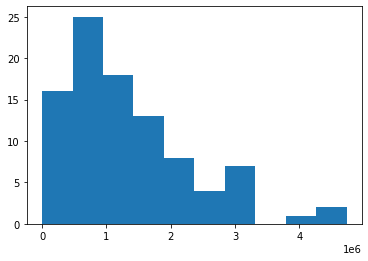

In [55]:
import matplotlib.pyplot as plt
plt.hist(april)

In [56]:
## 호선
subway["호선명"].value_counts()

호선명
2호선    150
3호선    102
1호선     30
Name: count, dtype: int64

In [58]:
line1 = subway.loc[subway["호선명"]=="1호선"]["승객수"]
line2 = subway.loc[subway["호선명"]=="2호선"]["승객수"]
line3 = subway.loc[subway["호선명"]=="3호선"]["승객수"]

In [59]:
print(stats.shapiro(line1))
print(stats.shapiro(line2))
print(stats.shapiro(line3))

ShapiroResult(statistic=0.8640193343162537, pvalue=0.0012365566799417138)
ShapiroResult(statistic=0.9226744771003723, pvalue=3.170428328758135e-07)
ShapiroResult(statistic=0.8860750794410706, pvalue=2.6614978310135484e-07)


모두 정규성을 만족하지 않는다.

##### 등분산성

- H0(귀무가설) : 집단간 분산은 동일하다.
- H1(대립가설) : 집단간 분산은 동일하지 않다.

In [60]:
### 월별
stats.levene(april, may, june)

LeveneResult(statistic=0.00974518466996433, pvalue=0.9903024828420797)

In [62]:
### 호선별
stats.levene(line1, line2, line3)

LeveneResult(statistic=10.40391714967012, pvalue=4.387236352895931e-05)

월별은 유의수준이 0.05보다 크므로 0.05 유의수준 하에서 귀무가설을 채택하여 분산이 동일하다고 볼 수 있지만, 호선별은 유의수준이 0.05보다 작아 귀무가설을 기각하여 집단간 분산이 동일하다고 볼 수 없다.

### 문제 2
2. 두 독립변수 모두 정규성을 만족하지 않는다고 가정하고 집단 간 평균에 차이가 존재하는지 확인하라.

**월별 가정**
- 귀무가설(H0) : 월별 승객수 평균에는 차이가 없다.
- 대립가설(H1) : 월별 승객수 평균에는 차이가 있다.

In [63]:
### 월별
stats.kruskal(april, may, june)

KruskalResult(statistic=0.10765787886691669, pvalue=0.947594188637232)

p-value가 0.05보다 크므로 유의수준 0.05하에서 귀무가설을 기각하지 않는다. 따라서 월별 승객수 평균에는 차이가 없다.

**호선별 가정**
- 귀무가설(H0) : 호선별 승객수 평균에는 차이가 없다.
- 대립가설(H1) : 호선별 승객 수 평균에는 차이가 있다.

In [64]:
stats.kruskal(line1, line2, line3)

KruskalResult(statistic=34.938348436134106, pvalue=2.5896080336130835e-08)

p-value가 0.05보다 작으므로 유의수준 0.05하에서 귀무가설을 기각한다. 따라서 호선별 승객수 평균에는 차이가 있다.

### 문제 3
1. 호선명 독립변수가 정규성을 만족하되 등분산성을 만족하지 않는다고 가정하고 호선별 평균에 차이가 존재하는지 확인하라.

- 귀무가설(H0) : 호선별 승객수 평균은 동일하다.
- 대립가설(H1) : 호선별 승객수 평균은 동일하지 않다.

In [66]:
import pingouin as pg

In [68]:
pg.welch_anova(dv = "승객수", between = "호선명", data = subway)

,Source,ddof1,ddof2,F,p-unc,np2
0,호선명,2,87.178677,22.136598,1.680962e-08,0.115099


p-value(p-unc)가 0.05보다 작으므로 귀무가설을 기각한다. 즉 호선별 승객수는 동일하지 않다.

### 문제 3
- 두 독립변수가 모두 정규성과 등분산성을 만족한다고 가정하고 아래 지시를 따르라.

4-1. 교호작용 효과를 검정하라.

4-2. 주효과 검정을 시행하라.

- 귀무가설1(H0) : 호선명 변수와 월별 변수의 상호작용 효과가 없다.
- 귀무가설2(H0) : 호선별 승객수 평균에는 차이가 없다.
- 귀무가설3(H0) : 월별 승객 수 평균에는 차이가 없다.
- 대립가설1(H1) : 호선명 변수와 월별 변수의 상호작용 효과가 있다.
- 대립가설2(H1) : 호선별 승객수 평균에는 차이가 있다.
- 대립가설3(H1) : 월별 승객 수 평균에는 차이가 있다.

In [70]:
subway.columns

Index(['사용월', '호선명', '지하철역', '승객수', 'month'], dtype='object')

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = '승객수~ C(호선명)+C(month)+C(호선명):C(month)'
model = ols(formula, subway).fit()
aov_table = anova_lm(model)

In [75]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(호선명),2.0,3.237973e+13,1.618987e+13,17.758881,5.616396e-08
C(month),2.0,5.652276e+10,2.826138e+10,0.031000,9.694787e-01
C(호선명):C(month),4.0,3.341967e+09,8.354917e+08,0.000916,9.999983e-01
Residual,273.0,2.488802e+14,9.116490e+11,NaN,NaN


- 호선명과 월별 상호작용 효과에 대한 결과 p-value가 9.999983e-01로 0.05보다 크므로 귀무가설을 기각하지 않는다. 따라서 호선명변수와 월별 변수간에는 교호작용이 존재하지 않는다. **두 변수가 교호작용이 존재하지 않으므로 아래 주효과검정이 의미를 갖는다.**
- 호선명 변수를 확인한 결과 유의확률이 5.616396e-08로 0.05보다 작므므로 유의수준 0.05하에서 귀무가설을 기각하여 호선별 승객수에는 차이가 있음을 알 수 있다.
- 월별 변수를 확인한 결과 유의확률이 9.694787e-01로 유의수준0.05보다 크므로 귀무가설이 기각되지 않는다. 따라서 월별에 따라 승객수에는 차이가 없다.


4-3. 호선명에 대한 사후분석을 시행하라.

In [12]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  func(*args, **kwargs)
C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\qotnd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: Use

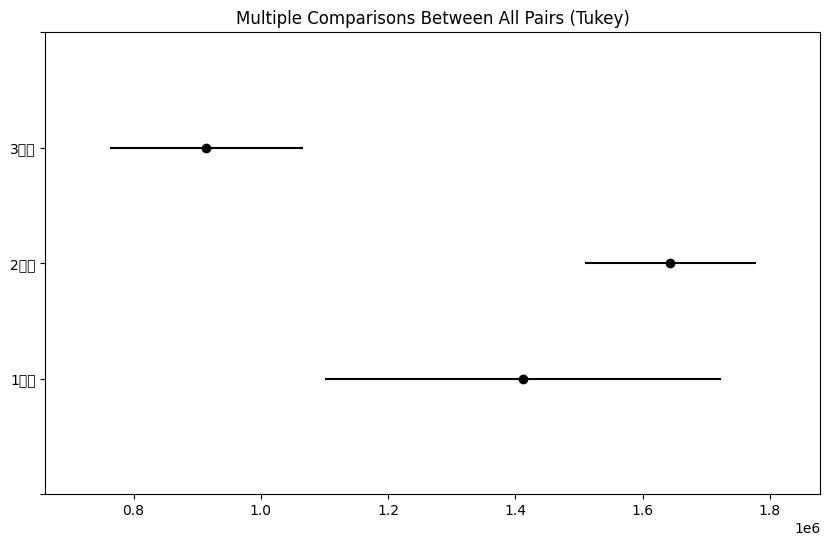

In [15]:
mc = MultiComparison(data = subway["승객수"], groups = subway["호선명"])
tuekeyhsd = mc.tukeyhsd(alpha = 0.05)
fig = tuekeyhsd.plot_simultaneous()

In [16]:
tuekeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1호선,2호선,231653.04,0.4387,-213494.7401,676800.8201,False
1호선,3호선,-497412.0431,0.0315,-959687.1085,-35136.9778,True
2호선,3호선,-729065.0831,0.0,-1014711.4938,-443418.6724,True


- 1호선과 2호선은 유의확률이 0.05보다 크므로 귀무가설을 채택한다. 따라서 1, 2호선은 승객차이가 없다.
- 1호선과 3호선, 2호선과 3호선은 모두 유의확률이 0.05보다 작으므로 귀무가설을 기각한다. 따라서, 1호선과 3호선, 2호선과 3호선은 호선별 승객의 차이가 존재한다.

### 5. Type3 anova를 시행한다면 기존코드와 어떻게 달라지는지 전후 코드를 설명하라.

In [22]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
formula = '승객수~ C(호선명)+C(month)+C(호선명):C(month)'
model = ols(formula, subway).fit()
aov_table_type3 = anova_lm(model, typ = 3)

In [27]:
print("type1")
display(aov_table)
print()
print("type3")

aov_table_type3

type1


,df,sum_sq,mean_sq,F,PR(>F)
C(호선명),2.0,3.237973e+13,1.618987e+13,17.758881,5.616396e-08
C(month),2.0,5.652276e+10,2.826138e+10,0.031000,9.694787e-01
C(호선명):C(month),4.0,3.341967e+09,8.354917e+08,0.000916,9.999983e-01
Residual,273.0,2.488802e+14,9.116490e+11,NaN,NaN



type3


,sum_sq,df,F,PR(>F)
Intercept,1.942132e+13,1.0,21.303504,0.000006
C(호선명),1.082850e+13,2.0,5.938964,0.002987
C(month),1.559176e+10,2.0,0.008551,0.991485
C(호선명):C(month),3.341967e+09,4.0,0.000916,0.999998
Residual,2.488802e+14,273.0,NaN,NaN


type3의 경우 intercept값이 존재하지만 type1의 경우 존재하지 않는다. 또한 type1은 mean_sq컬럼이 존재하지만 type3는 존재하지 않는다. 하지만 결과를 확인할 경우 typ1과 typ3의 결론이 같음을 알 수 있다.

# Ttest

### 문제 1
- A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv파일을 가지고 남녀학생의 평균 혈압에 차이가 없는지 분석하라. 단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정한다.

1.1 연구가설과 귀무가설을 설정하라.

- 귀무가설(H0) : 남녀 학생의 평균 혈압에는 차이가 없다.
- 대립가설(H1) : 남녀 학생의 평균 혈압에는 차이가 있다.

1.2 통계량을 구하고, 연구가설 채택여부를 기술하라.

In [1]:
import scipy.stats as stats

In [2]:
### 문제 데이터
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df.head()

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


In [3]:
male = df.loc[df["gender"]=="male"]["pressure"]
female = df.loc[df["gender"] == "female"]["pressure"]

In [4]:
stats.ttest_ind(male, female, equal_var = True)  ## 등분산임을 가정하므로 equal_var를 True로 설정한다.

Ttest_indResult(statistic=1.598335024574904, pvalue=0.12361716364314851)

pvalue가 0.05보다 크므로 유의수준 0.05하에서 귀무가설을 기각하지 않는다. 따라서 남녀학생의 평균 혈압에는 차이가 없다.

1.3 1.2에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라.

In [10]:
m1, m2 = np.mean(male), np.mean(female)
m = m1-m2

In [11]:
statistics = stats.ttest_ind(male, female, equal_var = True)[0]  ## 등분산임을 가정하므로 equal_var를 True로 설정한다.

In [18]:
statistics

1.598335024574904

In [13]:
sp = m/statistics
sp

3.9463809476154688

In [17]:
m1, m2

(96.21875, 89.9111111111111)

In [19]:
stats.t(n1+n2-2).isf(0.975)

-2.0686576104190406

In [25]:
### 95%신뢰구간 생성
n1, n2 = len(male), len(female)
lower = (m1-m2) + stats.t(n1+n2-2).isf(0.975)*sp
upper = (m1-m2) - stats.t(n1+n2-2).isf(0.025)*sp

In [26]:
lower, upper

(-1.8560720920085423, -1.856072092008544)

In [21]:
## chatgpt에게 물어본 다른 풀이

sample1 = male
sample2 = female

n1, n2 = len(sample1), len(sample2)
mean1, mean2 = np.mean(sample1), np.mean(sample2)
var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
standard_error = np.sqrt(pooled_var * (1 / n1 + 1 / n2))
confidence_interval = stats.t.interval(0.95, n1 + n2 - 2, loc=mean1 - mean2, scale=standard_error)

In [22]:
confidence_interval

(-1.8560720920085405, 14.471349869786346)

### 문제 2
-  강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오. (단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

2.1 귀무가설과 대립가설을 세우시오.

- 귀무가설(H0) : 강의 상류와 하류의 생물 다양성 점수에 차이가 없다.
- 대립가설(H1) : 강의 상류와 하류의 생물 다양성 점수에 차이가 있다.

In [6]:
### 문제 데이터
import pandas as pd

fish =  pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
fish

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3
5,F,46.1,61.3
6,G,53.8,42.7
7,H,49.4,50.2
8,I,49.6,49.1
9,J,51.6,57.7


2.2 검정통계량과 유의확률을 구하고, 연구가설 채택여부를 검정하시오.

In [30]:
### 정규성 검정
print(stats.shapiro(fish["up"]))
print(stats.shapiro(fish["down"]))

ShapiroResult(statistic=0.9635884165763855, pvalue=0.6447699666023254)
ShapiroResult(statistic=0.9821230173110962, pvalue=0.9640804529190063)


모두 pvalue 가 0.05보다 크므로 귀무가설을 기각하여 정규성을 만족하는 것을 알 수 있다. 따라서 대응표본 T검정을 진행한다.

In [31]:
stats.ttest_rel(fish["up"], fish["down"])

TtestResult(statistic=1.2922226959983891, pvalue=0.21262429174344777, df=18)

pvalue가 0.05보다 크므로 유의수준 0.05하에서 귀무가설을 기각하지 않는다. 따라서, 강의 상류와 하류의 생물 다양성 점수에 차이가 없다고 볼 수 있다.

### 문제 3
- 한 지역의 부엉이의 수는 지난 50년 동안 기록되었고, 지난 50년 동안의 평균 수(이전의 실험에서)는 106마리로 밝혀졌다. 지난 9년 동안 카운트는 아래 표에 기록되었습니다. 그 지역에 부엉이의 수에 변화가 생겼나요?

- 귀무가설(H0) : 부엉이 수의 평균은 106마리이다.
- 대립가설(H1) : 부엉이 수의 평균은 106마리가 아니다.

In [32]:
owl = np.array([108, 131, 156, 113, 105, 99, 140, 123, 110])

In [33]:
### 정규성 검정을 진행한다.
print(stats.shapiro(owl))

ShapiroResult(statistic=0.9238239526748657, pvalue=0.4248370826244354)


pvalue가 0.05보다 크므로 유의수준 0.05하에서 귀무가설을 기각하지 않는다. 따라서 정규성을 이루므로 일표본 t 검정을 진행한다.

In [34]:
stats.ttest_1samp(owl, 106)

TtestResult(statistic=2.341526767695357, pvalue=0.04730281429813129, df=8)

pvalue가 0.047로 0.05보다 작아 유의수준 0.05하에서 귀무가설을 기각한다. 따라서 부엉이 수의 평균은 106마리가 아니며, 값이 변했다고 볼 수 있다.